<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/mycode/modu/study_20210613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download datasets

In [1]:
# Download datasets
! mkdir dataset
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/ThoraricSurgery.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/housing.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/iris.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/pima-indians-diabetes.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/sonar.csv
! wget -NP ./dataset https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/wine.csv


--2021-06-14 08:22:13--  https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/ThoraricSurgery.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21257 (21K) [text/plain]
Saving to: ‘./dataset/ThoraricSurgery.csv’

ThoraricSurgery.csv 100%[===================>]  20.76K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2021-06-14 08:22:13 (36.8 MB/s) - ‘./dataset/ThoraricSurgery.csv’ saved [21257/21257]

--2021-06-14 08:22:13--  https://raw.githubusercontent.com/MarigoldJ/ygl2/main/%ED%95%99%EC%8A%B5%EC%9E%90%EB%A3%8C/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D/dataset/housing.csv
Resolving raw.githubusercontent.com

# import packages

In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 해본 것

## csv 파일에서 2차원 배열을 불러오는 두가지 방법

In [ ]:
d1 = pd.read_csv('./dataset/ThoraricSurgery.csv', header=None)
d2 = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=',')

equal = d1.values == d2
print((equal == False).sum())   # data1에 담긴 values가 곧 data2이다.

0


In [ ]:
d1.shape

(470, 18)

# 신경망 만들어서 학습시키기

* 모델 compile 옵션([tensorflow 문서 링크](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile))
    * loss ([문서 링크](https://keras.io/ko/losses/))
        * `mean_absolute_error` : MAE
        * `mean_absolute_percentage_error`
        * `mean_squared_error` : MSE
        * `mean_squared_logarithmic_error`
        * `binary_crossentropy` : choose 1 or 2
        * `categorical_crossentropy`
        * `sparse_categorical_crossentropy`
        * `hinge`
        * `squared_hinge`
        * `categorical_hinge`
        * `kullback_leibler_divergence`
        * `poisson`
        * `logcosh`
        * `cosine_proximity`
    * optimizer
        * `Adam`
        * `RMSprop`
        * `SGD`
        * 그 외에 adamdelta, adagrad, adamax, ftrl, nadam, optimizer가 있음
    * metrics

## binary classification

In [3]:
seed = 77
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
data1 = pd.read_csv('./dataset/ThoraricSurgery.csv', header=None)
x1 = data1.values[:, :17]   # 470 samples, 17 features
y1 = data1.values[:, 17]    # 470 samples, 1 classes

In [48]:
model1 = Sequential()
model1.add(Dense(30, input_dim=17, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# 17 - 30 - 1 Layer

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
print()

model1.fit(x1, y1, epochs=100, batch_size=10) # 470(데이터길이) = 10(배치크기) x 47(개)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                540       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.8532
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.8447
Epoch 6/100
47/47

In [49]:
model2 = Sequential()
model2.add(Dense(30, input_dim=17, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
# 17 - 30 - 1 Layer

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model2.summary())
print()

model2.fit(x1, y1, epochs=100, batch_size=10) # 470(데이터길이) = 10(배치크기) x 47(개)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                540       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 3.9827 - accuracy: 0.7979
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.8489
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.8489
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8277
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.8426
Epoch 6/100
47/47

In [50]:
model3 = Sequential()
model3.add(Dense(30, input_dim=17, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

model3.fit(x1, y1, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.8426
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.8447
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.8468
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.8511
Epoch 11/

In [51]:
# 결과 비교
print(f'model1 accuracy : {model1.evaluate(x1, y1)[1]}')
print(f'model2 accuracy : {model2.evaluate(x1, y1)[1]}')
print(f'model3 accuracy : {model3.evaluate(x1, y1)[1]}')

15/15 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
model1 accuracy : 0.8510638475418091
15/15 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8511
model2 accuracy : 0.8510638475418091
15/15 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.8532
model3 accuracy : 0.8531914949417114


## multi classification

# EDA 연습

In [19]:
col2 = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']
data2 = pd.read_csv('./dataset/pima-indians-diabetes.csv', header=None, names=col2) # header=None 을 빼도됨
data2

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
print(data2.head())
print()
print(data2.info())
print()
print(data2.describe())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-nul

In [28]:
# pregnant의 값에 따라 class를 확인
print(data2[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))
# as_index = True : 출력되는 Dataframe의 index가 pregnant 행이 됨.
# mean() : pregnant별로 다른 행(class)의 값의 평균을 출력 -> 발병확률로 볼 수 있음

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


* [cmap(컬러맵) 종류 확인 링크](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)

* [색상 팔레트 예제](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)



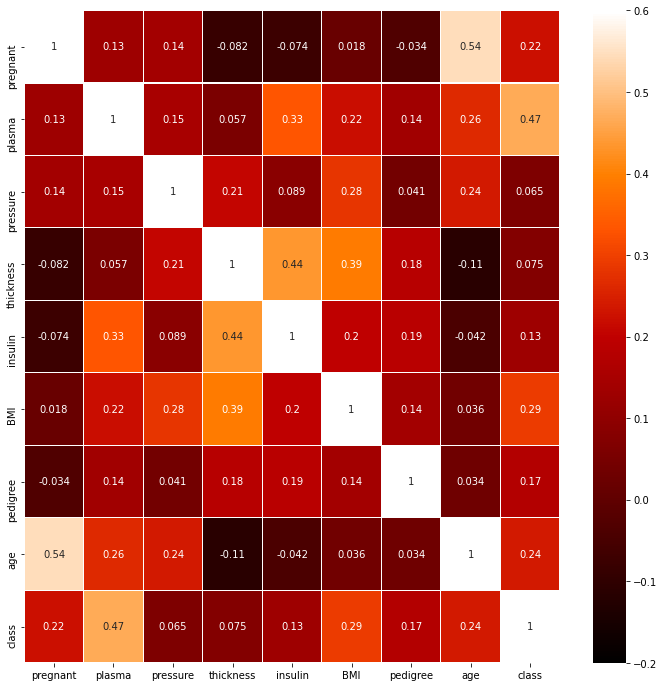

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr(), linewidths=0.1, linecolor='white',
            vmin=-0.2, vmax=0.6,
            cmap=plt.cm.gist_heat, annot=True)

# linewidths : cell간 구분선의 너비
# linecolor : cell간 구분선의 색깔

# vmax, vmin : 표현 값의 최대 최소 설정, 색에 반영
# center : 중앙값 선정

# cbar : 오른쪽에 색상 바 나타낼지 여부
# cmap : 정해진 팔레트, 색상

# annot : 각 map에 corr 수치를 표시할지 여부


* heatmap에서 class와 상관관계가 가장 큰 plasma를 확인해보자
* plasma와 class의 관계를 다시 확인해보자

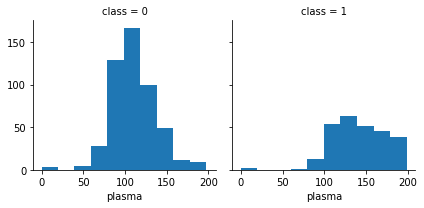

In [44]:
# class에 따라 다른 feature의 histogram을 확인
grid = sns.FacetGrid(data2, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()